## Interactive demo for spike sorting

Demo uses the extracted waveforms from waveforms.csv within the results directory for a given recording. 


In [1]:
import grnsuite.spike_detection as spikes
import grnsuite.spike_sorting as sorting
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Load waveforms from a results directory
results_dir = "results/20231103-M04-sucr-100-Gal-A1-02"
waveforms = pd.read_csv(os.path.join(results_dir, 'waveforms.csv')).values

 1. Plot all raw waveforms

<Figure size 1200x600 with 0 Axes>

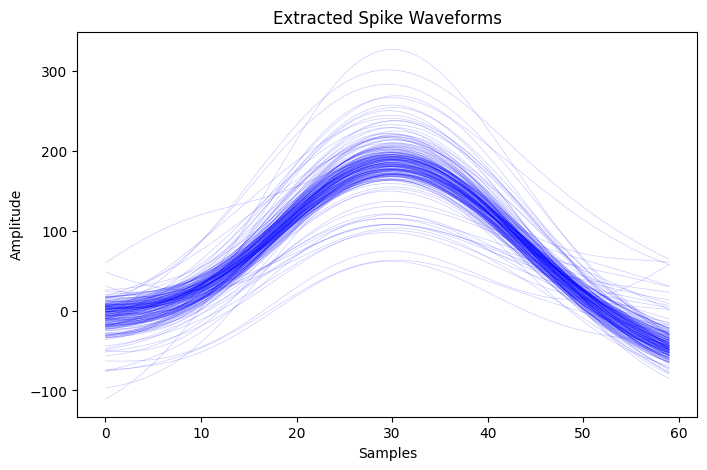

In [3]:
plt.figure(figsize=(12, 6))
spikes.plot_waveforms(waveforms)
plt.show()

2. Reduce dimensions with SVD and visualize first components

Explained variance with 3 components: 98.37%


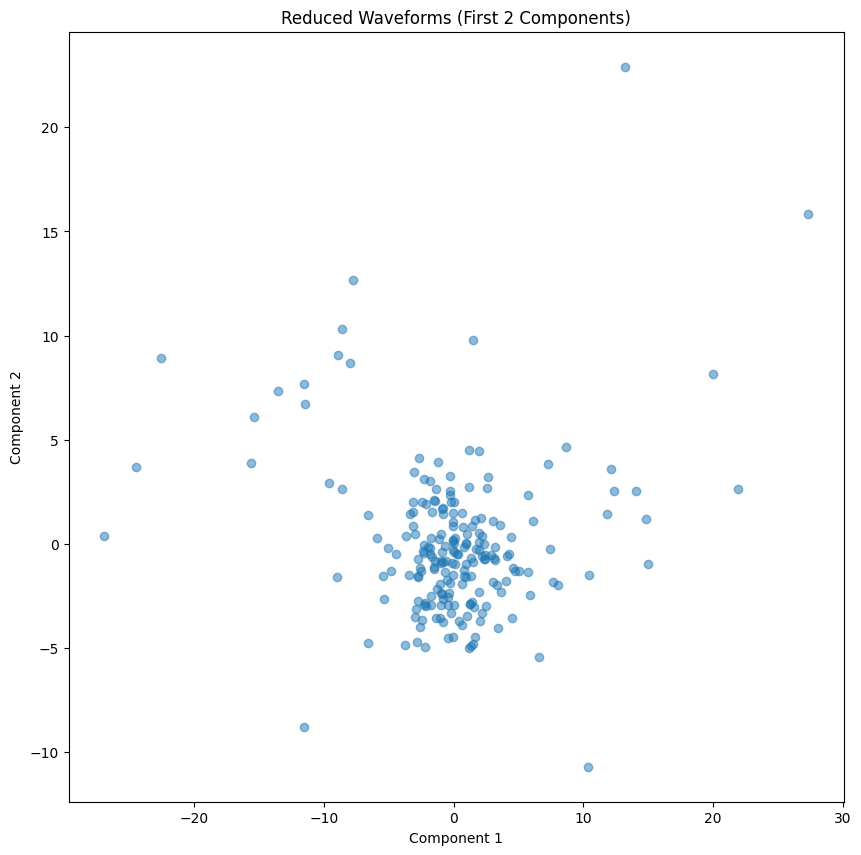

In [4]:
reduced_waveforms = sorting.reduce_dimensions(waveforms, n_components=3)

# Plot first two components
plt.figure(figsize=(10, 10))
plt.scatter(reduced_waveforms[:, 0], reduced_waveforms[:, 1], alpha=0.5)
plt.title("Reduced Waveforms (First 2 Components)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

3. Cluster the reduced waveforms and visualize

In [ ]:
labels = sorting.cluster_spikes(reduced_waveforms, eps=0.5, min_samples=5)

# Plot clusters in reduced space
plt.figure(figsize=(10, 10))
unique_labels = np.unique(labels)
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))

for label, color in zip(unique_labels, colors):
    mask = labels == label
    if label == -1:
        plt.scatter(reduced_waveforms[mask, 0], reduced_waveforms[mask, 1], 
                   c='k', alpha=0.1, label='noise')
    else:
        plt.scatter(reduced_waveforms[mask, 0], reduced_waveforms[mask, 1], 
                   c=[color], alpha=0.6, label=f'cluster {label}')

plt.title("Clusters in Component Space")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend()
plt.show()

4. PLot mean waveforms for each cluster


In [ ]:
plt.figure(figsize=(12, 6))
for label, color in zip(unique_labels, colors):
    if label != -1:  # Skip noise cluster
        mask = labels == label
        cluster_waveforms = waveforms[mask]
        mean_waveform = np.mean(cluster_waveforms, axis=0)
        std_waveform = np.std(cluster_waveforms, axis=0)
        
        time_points = np.arange(len(mean_waveform))
        plt.plot(time_points, mean_waveform, color=color, 
                label=f'cluster {label}', linewidth=2)
        plt.fill_between(time_points, 
                       mean_waveform - std_waveform,
                       mean_waveform + std_waveform,
                       color=color, alpha=0.2)

plt.title("Mean Waveforms by Cluster")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

Print cluster statistics

In [ ]:
print("\nCluster Statistics:")
for label in unique_labels:
    if label == -1:
        print(f"Noise points: {np.sum(labels == label)}")
    else:
        print(f"Cluster {label} size: {np.sum(labels == label)}")